# **Inserting or importing the data set**

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = '/content/household_power_consumption.txt'

# Load the data
df = pd.read_csv(file_path, sep=';', parse_dates={'Datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False)

print(df.head())

             Datetime Global_active_power Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00               4.216                 0.418  234.840   
1 2006-12-16 17:25:00               5.360                 0.436  233.630   
2 2006-12-16 17:26:00               5.374                 0.498  233.290   
3 2006-12-16 17:27:00               5.388                 0.502  233.740   
4 2006-12-16 17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


# **Pre-processing of dataset**

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as needed
df = df.dropna()

df.replace('?', pd.NA, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Convert data types if needed
df['Global_active_power'] = df['Global_active_power'].astype(float)
df['Global_reactive_power'] = df['Global_reactive_power'].astype(float)
df['Voltage'] = df['Voltage'].astype(float)
df['Global_intensity'] = df['Global_intensity'].astype(float)
df['Sub_metering_1'] = df['Sub_metering_1'].astype(float)
df['Sub_metering_2'] = df['Sub_metering_2'].astype(float)
df['Sub_metering_3'] = df['Sub_metering_3'].astype(float)

# Compute basic statistics
print(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].describe())

# Identify trends and patterns
df.set_index('Datetime', inplace=True)
print(df.resample('D').mean())

Datetime                     0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64
       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  
count      2.049280e+06  
mean       4.627759e+00  
std        4.444396e+00  
min        2.000000e-01  
25%  

# **Linear regression with 100 data**

Mean Squared Error: 0.7798819840538866
R^2 Score: 0.4139174428196062
score for test: 0.4139174428196062
score for train: 0.41082946151009203


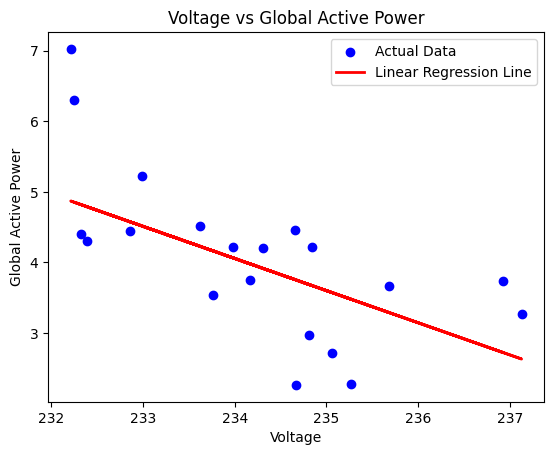

    Actual Spending  Predicted Spending
83            4.218            4.064965
53            4.202            3.914748
70            3.538            4.165110
45            4.464            3.755426
44            6.308            4.852467
39            3.740            2.722114
22            7.026            4.870675
80            2.978            3.687146
10            4.448            4.574793
0             4.216            3.673490
18            3.266            2.631073
30            2.720            3.573345
73            4.408            4.820603
33            4.512            4.228838
90            4.298            4.788739
4             3.666            3.291118
76            2.264            3.750874
77            2.270            3.477752
12            5.224            4.515616
31            3.758            3.978476


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



df1 = pd.read_csv('/content/household_power_consumption.txt', sep=';', parse_dates={'Datetime': ['Date', 'Time']},
                  infer_datetime_format=True, low_memory=False)

df1.replace('?', pd.NA, inplace=True)
df1.dropna(inplace=True)

df=df1.head(100)
# Explicitly convert columns to numeric, handling errors
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

df.dropna(inplace=True)

X = df[['Voltage']]  #  (independent variable)
y = df['Global_active_power']  # (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'score for test: {model.score(X_test,y_test)}')
print(f'score for train: {model.score(X_train,y_train)}')

# Plotting the results
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Voltage')
plt.ylabel('Global Active Power')
plt.title('Voltage vs Global Active Power')
plt.legend()
plt.show()

predicted_values = pd.DataFrame({'Actual Spending': y_test, 'Predicted Spending': y_pred})
print(predicted_values)

# **multi variable linear regression**

Mean Squared Error: 0.003634496804501148
R^2 Score: 0.9972686698438993
score for test: 0.9972686698438993
score for train: 0.9972671369947114


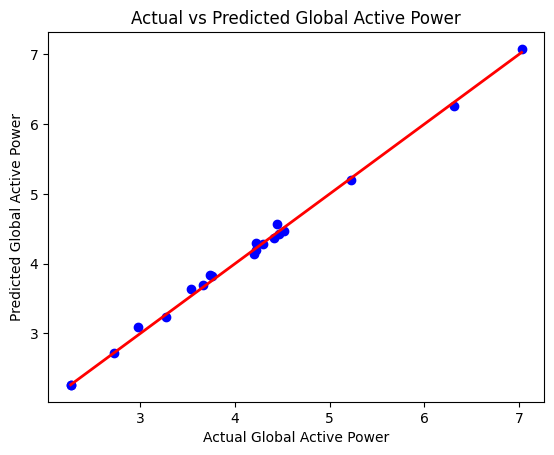

In [ ]:

# (independent variables)
X = df[['Voltage', 'Global_reactive_power', 'Global_intensity']]
# (dependent variable)
y = df['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'score for test: {model.score(X_test,y_test)}')
print(f'score for train: {model.score(X_train,y_train)}')

# Visualizing the comparison between actual and predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Global Active Power')
plt.ylabel('Predicted Global Active Power')
plt.title('Actual vs Predicted Global Active Power')
plt.show()


# logistic **regression**


Accuracy: 0.9990411266396002
score for test: 0.9990411266396002
score for train: 0.999066745393504
Confusion Matrix:
[[406048    187]
 [   206   3415]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    406235
           1       0.95      0.94      0.95      3621

    accuracy                           1.00    409856
   macro avg       0.97      0.97      0.97    409856
weighted avg       1.00      1.00      1.00    409856



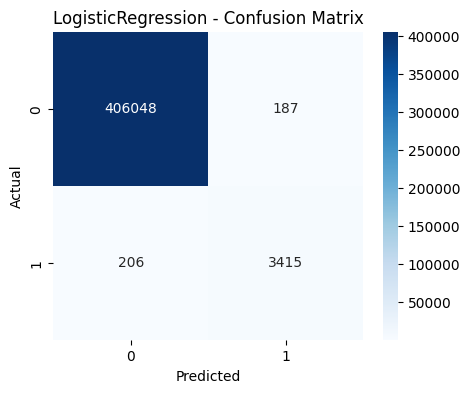

In [ ]:
!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score

df=df1.head(12000000)
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['High_Power'] = (df['Global_active_power'] > 5).astype(int)

#(independent variables)
X = df[['Voltage', 'Global_reactive_power', 'Global_intensity']]
#(dependent variable)
y = df['High_Power']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Creating the Logistic Regression model
model = LogisticRegression()
# Training the model
model.fit(X_train, y_train)
# Making predictions on the test set
y_pred = model.predict(X_test)
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'score for test: {model.score(X_test,y_test)}')
print(f'score for train: {model.score(X_train,y_train)}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('LogisticRegression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

scores = cross_val_score(model, X, y, cv=5)

# **cross validation for logistic regression**

In [ ]:
# Print the cross-validation scores and their mean
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.99844092 0.99913872 0.99958522 0.99878494 0.99904601]
Mean cross-validation score: 0.9989991606808244


# **logistic in single variable**


In [ ]:
from sklearn.preprocessing import StandardScaler
df['Global_active_power'] = df['Global_active_power'].astype(float)
median_consumption = df['Global_active_power'].median()
df['High_consumption'] = (df['Global_active_power'] > median_consumption).astype(int)

df.drop(['Global_active_power'], axis=1, inplace=True)

X = df.drop(['High_consumption', 'Datetime'], axis=1)
y = df['High_consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Accuracy: 0.99
score for test: 0.49978203726837395
score for train: 0.49978180489872404
Confusion Matrix:
[[305660   1866]
 [  2347 304911]]


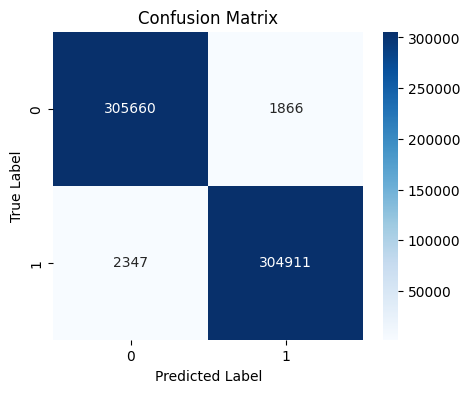

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    307526
           1       0.99      0.99      0.99    307258

    accuracy                           0.99    614784
   macro avg       0.99      0.99      0.99    614784
weighted avg       0.99      0.99      0.99    614784



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'score for test: {log_reg.score(X_test,y_test)}')
print(f'score for train: {log_reg.score(X_train,y_train)}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


In [ ]:
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)

# Print cross-validation results
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

Cross-validation scores: [0.99302196 0.99299405 0.99291737 0.9928616  0.99290691]
Mean cross-validation score: 0.99


# **RandomForesst model with 30% test data**

Accuracy on test set: 0.99
score for test: 0.49966666666666665
score for train: 0.49967142857142854


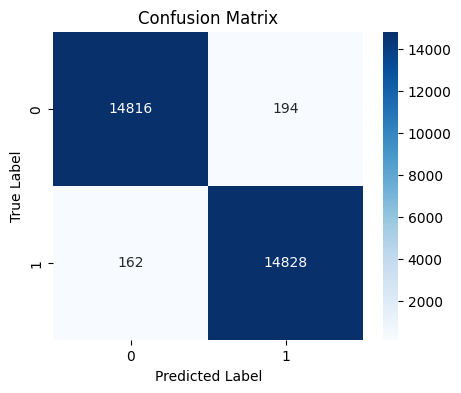

Cross-validation scores: [0.98907143 0.9885     0.98778571 0.98871429 0.98935714]
Mean cross-validation score: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15010
           1       0.99      0.99      0.99     14990

    accuracy                           0.99     30000
   macro avg       0.99      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df1 = pd.read_csv('/content/household_power_consumption.txt', sep=';',
                 parse_dates={'Datetime': ['Date', 'Time']},
                 infer_datetime_format=True, low_memory=False)

df1.replace('?', pd.NA, inplace=True)

df1.dropna(inplace=True)
df=df1.head(100000)
df['Global_active_power'] = df['Global_active_power'].astype(float)

# Create a binary target variable
median_consumption = df['Global_active_power'].median()
df['High_consumption'] = (df['Global_active_power'] > median_consumption).astype(int)
df.drop(['Global_active_power'], axis=1, inplace=True)
# Split data into features and target variable
X = df.drop(['High_consumption', 'Datetime'], axis=1)
y = df['High_consumption']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.2f}')
print(f'score for test: {rf_model.score(X_test,y_test)}')
print(f'score for train: {rf_model.score(X_train,y_train)}')

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# **random forest with 20% test data**







Accuracy on test set: 0.99


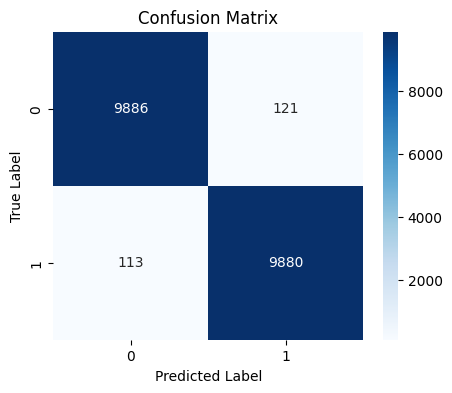

Cross-validation scores: [0.98775   0.9888125 0.989375  0.9883125 0.989625 ]
Mean cross-validation score: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10007
           1       0.99      0.99      0.99      9993

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)

# Train the Random Forest model on the full training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.2f}')

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# **random forest with 10% test data**

Accuracy on test set: 0.99


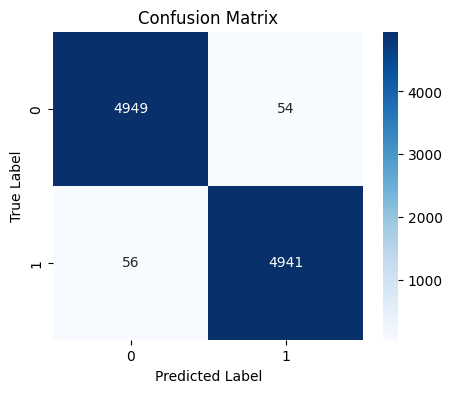

Cross-validation scores: [0.98833333 0.98933333 0.98883333 0.98988889 0.98772222]
Mean cross-validation score: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5003
           1       0.99      0.99      0.99      4997

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)

# Train the Random Forest model on the full training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.2f}')

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# **k flod with logistic regression**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Split data into features and target variable
X = df.drop(['High_consumption', 'Datetime'], axis=1)
y = df['High_consumption']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = LogisticRegression(random_state=42)

# Apply K-Fold Cross-Validation
cv_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the results
print(f"Cross-Validation Accuracy Scores: {cv_results}")
print(f"Mean Accuracy: {cv_results.mean()}")  # Average accuracy across all folds
print(f"Standard Deviation: {cv_results.std()}")  # Variability in accuracy

fold_number = 1
for train_index, test_index in kf.split(X):
    print(f"Fold {fold_number}:")
    print(f"Training indices: {train_index}")
    print(f"Validation indices: {test_index}")
    fold_number += 1


Cross-Validation Accuracy Scores: [0.9825  0.9813  0.9814  0.98225 0.97985]
Mean Accuracy: 0.98146
Standard Deviation: 0.0009302687783646217
Fold 1:
Training indices: [    0     1     2 ... 99996 99997 99998]
Validation indices: [    8    23    39 ... 99991 99993 99999]
Fold 2:
Training indices: [    0     1     2 ... 99997 99998 99999]
Validation indices: [    4     6     7 ... 99984 99987 99996]
Fold 3:
Training indices: [    1     2     3 ... 99997 99998 99999]
Validation indices: [    0     9    11 ... 99986 99988 99992]
Fold 4:
Training indices: [    0     2     4 ... 99996 99997 99999]
Validation indices: [    1     3    10 ... 99989 99994 99998]
Fold 5:
Training indices: [    0     1     3 ... 99996 99998 99999]
Validation indices: [    2     5    15 ... 99990 99995 99997]


# **Mcnamar test**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from statsmodels.stats.contingency_tables import mcnemar

# Prepare your data (assuming df is your DataFrame and target variable is 'High_consumption')
X = df.drop(['High_consumption', 'Datetime'], axis=1)
y = df['High_consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Check accuracy of both models (just for reference)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"Random Forest Accuracy: {accuracy_rf}")

import numpy as np
from statsmodels.stats.contingency_tables import mcnemar

# Create a contingency table
contingency_table = np.zeros((2, 2), dtype=int)

# Fill the contingency table
for i in range(len(y_test)):
    if y_pred_log_reg[i] == y_test.iloc[i] and y_pred_rf[i] == y_test.iloc[i]:
        contingency_table[0, 0] += 1  # Both correct
    elif y_pred_log_reg[i] == y_test.iloc[i] and y_pred_rf[i] != y_test.iloc[i]:
        contingency_table[0, 1] += 1  # Logistic correct, Random Forest incorrect
    elif y_pred_log_reg[i] != y_test.iloc[i] and y_pred_rf[i] == y_test.iloc[i]:
        contingency_table[1, 0] += 1  # Logistic incorrect, Random Forest correct
    else:
        contingency_table[1, 1] += 1  # Both incorrect

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the McNemar test
result = mcnemar(contingency_table, exact=False)
print(f"McNemar's test statistic: {result.statistic}")
print(f"p-value: {result.pvalue}")

# Interpret the result
if result.pvalue < 0.05:
    print("There is a significant difference between the two classifiers.")
else:
    print("There is no significant difference between the two classifiers.")


Logistic Regression Accuracy: 0.9844333333333334
Random Forest Accuracy: 0.9881333333333333
Contingency Table:
[[29410   123]
 [  234   233]]
McNemar's test statistic: 33.89355742296919
p-value: 5.821114142861747e-09
There is a significant difference between the two classifiers.


# **T-test**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.stats import ttest_rel

# Assume your DataFrame is already prepared, with features in X and target in y
X = df.drop(['High_consumption', 'Datetime'], axis=1)
y = df['High_consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Calculate accuracy scores for both models
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"Random Forest Accuracy: {accuracy_rf}")
# Calculate the accuracy for each test sample (1 if correct, 0 if incorrect)
accuracy_log_reg_per_sample = (y_pred_log_reg == y_test).astype(int)
accuracy_rf_per_sample = (y_pred_rf == y_test).astype(int)

# Perform the paired t-test
t_statistic, p_value = ttest_rel(accuracy_log_reg_per_sample, accuracy_rf_per_sample)

# Print the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("There is a significant difference between the two models.")
else:
    print("There is no significant difference between the two models.")

Logistic Regression Accuracy: 0.9844333333333334
Random Forest Accuracy: 0.9881333333333333
t-statistic: -5.878027136942886
p-value: 4.195713460137079e-09
There is a significant difference between the two models.


# **KNN analysis**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assume df is your dataset and has been preprocessed
X = df.drop(['High_consumption', 'Datetime'], axis=1)
y = df['High_consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create KNN classifier with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

# Train the model
knn_manhattan.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_manhattan.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn)

print(f"Accuracy: {accuracy}")
print(f"Classification Report: \n{report}")


Accuracy: 0.9841333333333333
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     15010
           1       0.98      0.98      0.98     14990

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



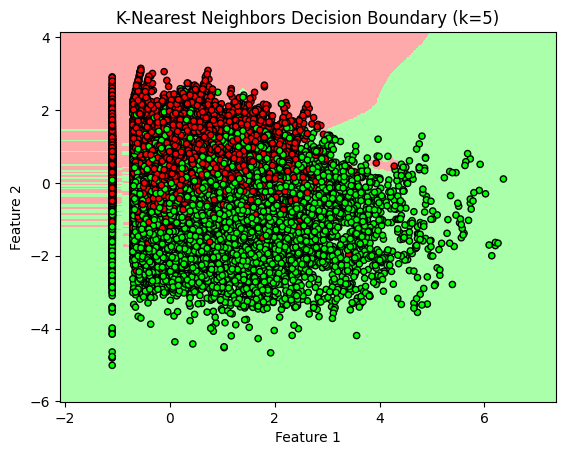

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Using only two features for visualization
X_plot = X_train_scaled[:, :2]
X_test_plot = X_test_scaled[:, :2]

# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_plot, y_train)

# Create a mesh grid
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict classes for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure()
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.title("K-Nearest Neighbors Decision Boundary (k=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()